## 1. Revisión Inicial y Comprensión de la Estructura de los Datos

In [150]:
# Importar librerias

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px 
import plotly.express as px 
import math as e
from matplotlib import ticker
import plotly.graph_objects as go 
import chart_studio.plotly as py    
import os 
import json
import geopandas as gpd 
from wordcloud import WordCloud
pd.options.display.float_format = '{:.2f}'.format

# https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

In [151]:
# Carga de datos 

data = pd.read_csv(r'data/cardio_train.csv' , sep = ';')

In [152]:
# Descripcion general de datos
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.00,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.00,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.00,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.00,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.00,100,60,1,1,0,0,0,0


In [153]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [154]:
# Ver la cantidad de datos faltantes en el dataset
data.isnull().sum()


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [155]:
# Ver el tipo de datos de las columnas
data.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [156]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00
mean,49972.42,19468.87,1.35,164.36,74.21,128.82,96.63,1.37,1.23,0.09,0.05,0.80,0.50
std,28851.30,2467.25,0.48,8.21,14.40,154.01,188.47,0.68,0.57,0.28,0.23,0.40,0.50
min,0.00,10798.00,1.00,55.00,10.00,-150.00,-70.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,25006.75,17664.00,1.00,159.00,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.00,0.00
50%,50001.50,19703.00,1.00,165.00,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.00,0.00
75%,74889.25,21327.00,2.00,170.00,82.00,140.00,90.00,2.00,1.00,0.00,0.00,1.00,1.00
max,99999.00,23713.00,2.00,250.00,200.00,16020.00,11000.00,3.00,3.00,1.00,1.00,1.00,1.00


In [157]:
# Ver el numero de filas y columnas
data.shape

(70000, 13)

## 2. Limpieza de Datos

In [158]:
# Modificar la edad de dias a años, el resultado muestre dos enteros
data['age'] = data['age']/365
data['age'] = data['age'].astype(int)


In [159]:
# Modificar height de cm a m, el resultado muestre tres decimales
data['height'] = (data['height'] / 100).round(3)


In [160]:
# Eliminar las filas de height que sean menores a 90 cm 
data = data[(data['height'] >= 1.10) & (data['height'] <= 2.10)]


In [161]:
# Cambiar el nombre de la columna ap_hi a systolic y ap_lo a diastolic
data.rename(columns = {'ap_hi':'systolic', 'ap_lo':'diastolic'}, inplace = True)


In [162]:
# sistolica normal menos de 120 mayor de 180, diastolica menos de 80 y mas de 120
# Eliminar las filas systolic menores a 90 y mayores a 210 y diastolic menores a 50 y mayores a 150
data = data[(data['systolic'] >= 90) & (data['systolic'] <= 210)]
data = data[(data['diastolic'] >= 50) & (data['diastolic'] <= 150)]

In [163]:
data.head()

,id,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,1.68,62.00,110,80,1,1,0,0,1,0
1,1,55,1,1.56,85.00,140,90,3,1,0,0,1,1
2,2,51,1,1.65,64.00,130,70,3,1,0,0,0,1
3,3,48,2,1.69,82.00,150,100,1,1,0,0,1,1
4,4,47,1,1.56,56.00,100,60,1,1,0,0,0,0


In [164]:
data.describe()

,id,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio
count,68543.00,68543.00,68543.00,68543.00,68543.00,68543.00,68543.00,68543.00,68543.00,68543.00,68543.00,68543.00,68543.00
mean,49969.96,52.83,1.35,1.64,74.12,126.66,81.34,1.36,1.23,0.09,0.05,0.80,0.50
std,28844.03,6.77,0.48,0.08,14.30,16.51,9.42,0.68,0.57,0.28,0.22,0.40,0.50
min,0.00,29.00,1.00,1.10,11.00,90.00,50.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,25001.00,48.00,1.00,1.59,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.00,0.00
50%,50006.00,53.00,1.00,1.65,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.00,0.00
75%,74860.50,58.00,2.00,1.70,82.00,140.00,90.00,1.00,1.00,0.00,0.00,1.00,1.00
max,99999.00,64.00,2.00,2.07,200.00,210.00,150.00,3.00,3.00,1.00,1.00,1.00,1.00


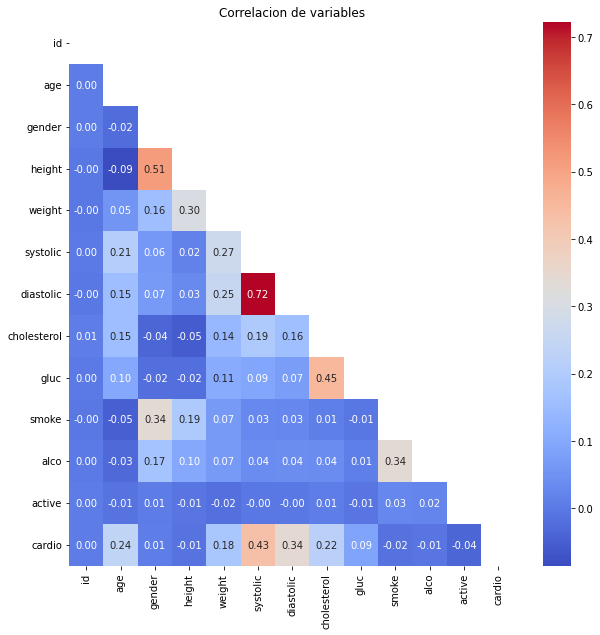

In [165]:
# ver la relacion entre las variables y graficarlas con mask
plt.figure(figsize=(10,10))
mask = np.triu(data.corr())
sns.heatmap(data.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm', mask = mask)
plt.title('Correlacion de variables')
plt.show()

## 3. Análisis univariado

Text(0.5, 1.0, 'Distribucion del colesterol')

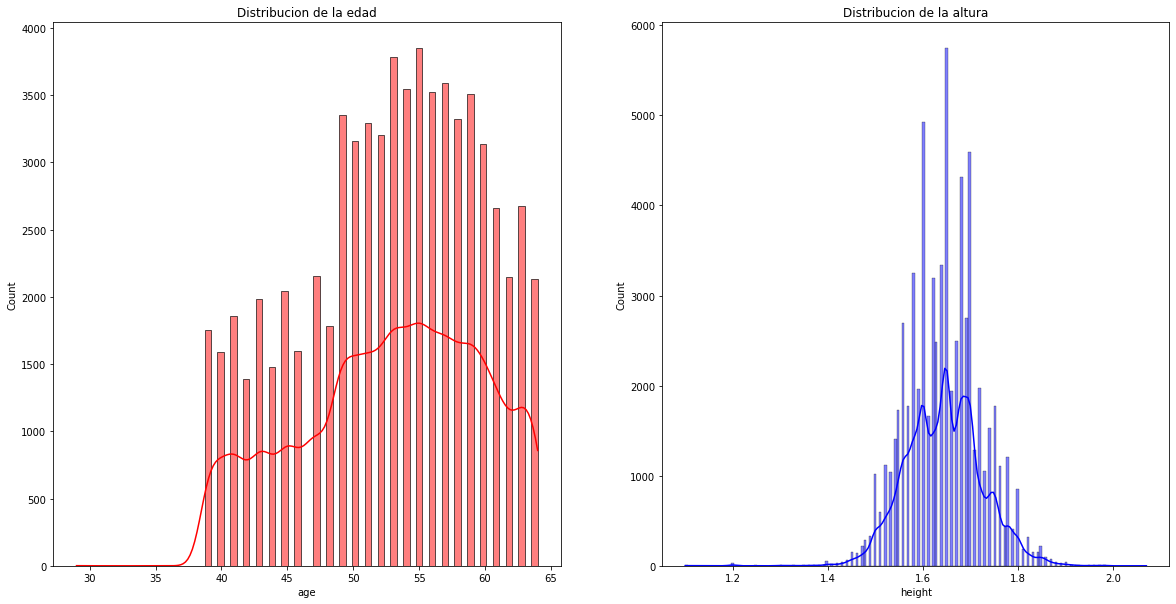

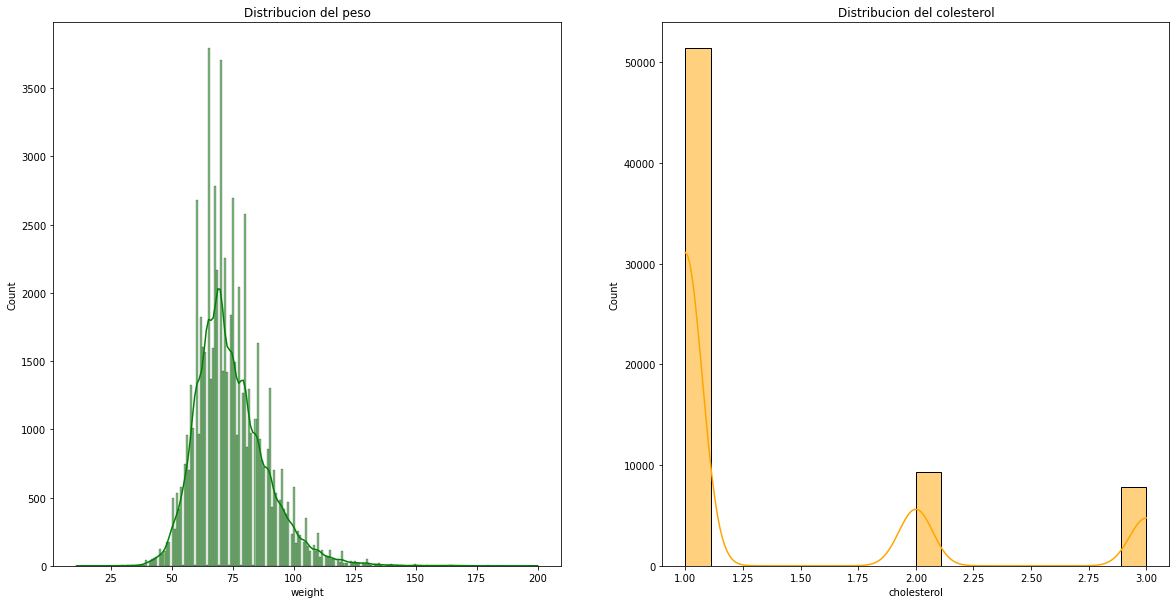

In [166]:
# distribucion de las columnas
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.histplot(data['age'], kde=True, color = 'red')
plt.title('Distribucion de la edad')

plt.subplot(1,2,2)
sns.histplot(data['height'], kde=True, color = 'blue')
plt.title('Distribucion de la altura')

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.histplot(data['weight'], kde=True, color = 'green')
plt.title('Distribucion del peso')

plt.subplot(1,2,2)
sns.histplot(data['cholesterol'], kde=True, color = 'orange')
plt.title('Distribucion del colesterol')



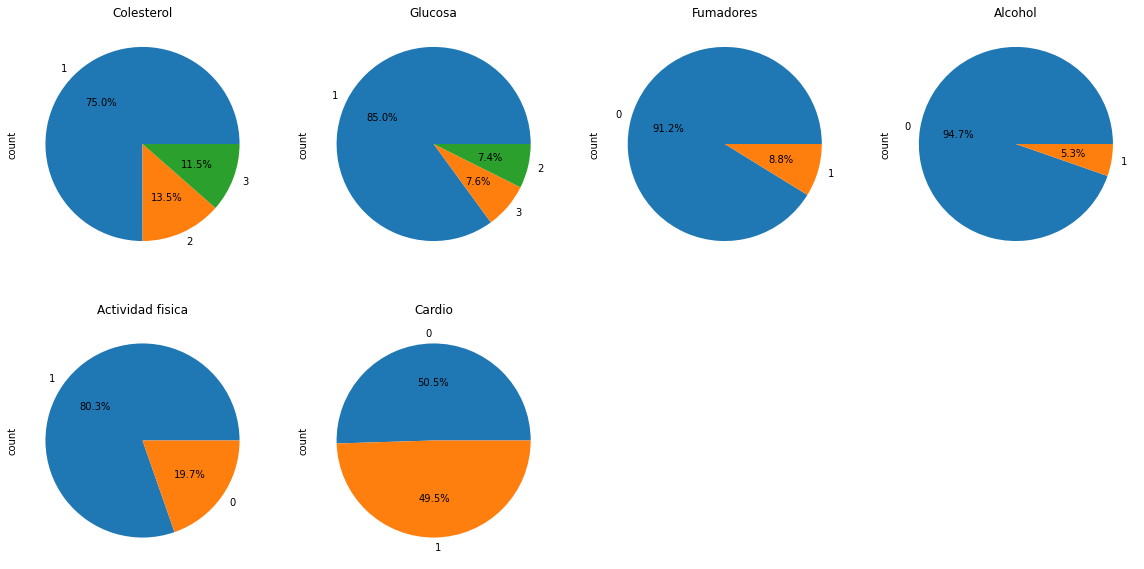

In [167]:
# Graficas pie de las variables 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
data['cholesterol'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Colesterol') # 1: normal, 2: por encima de lo normal, 3: muy por encima de lo normal

plt.subplot(2,4,2)
data['gluc'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Glucosa') # 1: normal, 2: por encima de lo normal, 3: muy por encima de lo normal 

plt.subplot(2,4,3)
data['smoke'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Fumadores') # 0 = No, 1 = Si

plt.subplot(2,4,4)
data['alco'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Alcohol') # 0 = No, 1 = Si

plt.subplot(2,4,5)
data['active'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Actividad fisica') # 0 = No, 1 = Si

plt.subplot(2,4,6)
data['cardio'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Cardio') # 0 = No, 1 = Si

plt.show()

In [168]:
# Agrupar los datos de la columna systolica en rangos de 10
systolic_range = data['systolic'] = pd.cut(data['systolic'], bins = [0,120,130,140,160,180,250], labels = ['Normal', 'Elevada', 'Hipertension 1', 'Hipertension 2', 'Hipertension 3', 'Emergencia'], right = False)

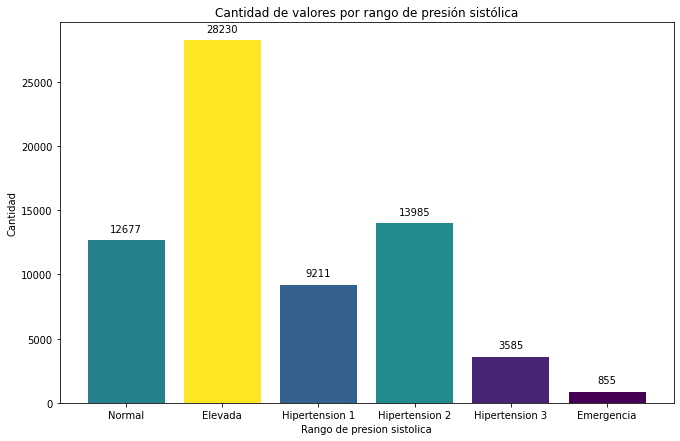

In [169]:
# Contar los valores por rango
systolic_counts = systolic_range.value_counts().sort_index()

# Crear un colormap basado en los valores contados
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(systolic_counts.min(), systolic_counts.max())
colors = [cmap(norm(value)) for value in systolic_counts]

# Graficar usando bar plot
plt.figure(figsize=(11, 7))
plt.bar(systolic_counts.index, systolic_counts.values, color=colors)
plt.xlabel('Rango de presion sistolica')
plt.ylabel('Cantidad')
plt.title('Cantidad de valores por rango de presión sistólica')

# Poner las etiquetas de los rangos en la grafica junto con su valor numerico
for i, value in enumerate(systolic_counts.values):
    plt.text(i, value + 500, str(value), ha='center', va='bottom')

plt.show()


In [170]:
# Agrupar los datos de la columna diastolica en rangos de 10 
diastolic_range = data['diastolic'] = pd.cut(data['diastolic'], bins = [0,80,117,130,150], labels = ['Normal', 'Baja', 'Hipotension', 'Emergencia'], right = False)


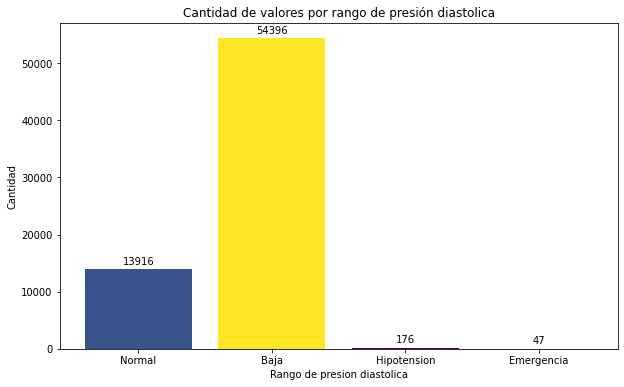

In [171]:
# Contar los valores por rango
diastolic_counts = diastolic_range.value_counts().sort_index()

# Crear un colormap basado en los valores contados
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(diastolic_counts.min(), diastolic_counts.max())
colors = [cmap(norm(value)) for value in diastolic_counts]

# Graficar usando bar plot
plt.figure(figsize=(10, 6))
plt.bar(diastolic_counts.index, diastolic_counts.values, color=colors)
plt.xlabel('Rango de presion diastolica')
plt.ylabel('Cantidad')
plt.title('Cantidad de valores por rango de presión diastolica')

# Poner las etiquetas de los rangos en la grafica junto con su valor numerico
for i, value in enumerate(diastolic_counts.values):
    plt.text(i, value + 500, str(value), ha='center', va='bottom')

plt.show()

## 4. Analisis Bivariado


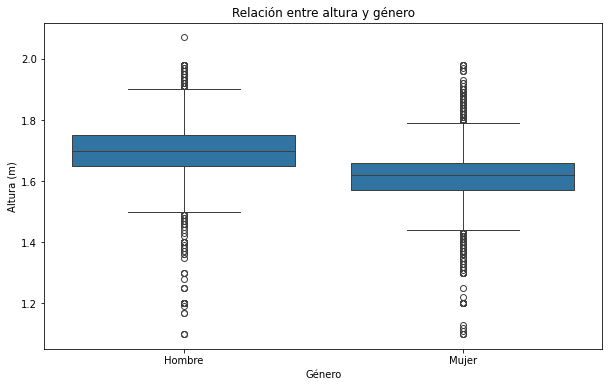

<ipython-input-172-e46fc873ae14>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender'] = data['gender'].replace({'Mujer': 1, 'Hombre': 2})


In [172]:
# Cambiar momentaneamente los nombres de las variables de la columna gender
data['gender'] = data['gender'].replace({1: 'Mujer', 2: 'Hombre'})

# Graficar la relacion entre la columna height y gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='height', data=data)
plt.title('Relación entre altura y género')
plt.xlabel('Género')
plt.ylabel('Altura (m)')
plt.show()

# Revertir los cambios en la columna gender
data['gender'] = data['gender'].replace({'Mujer': 1, 'Hombre': 2})


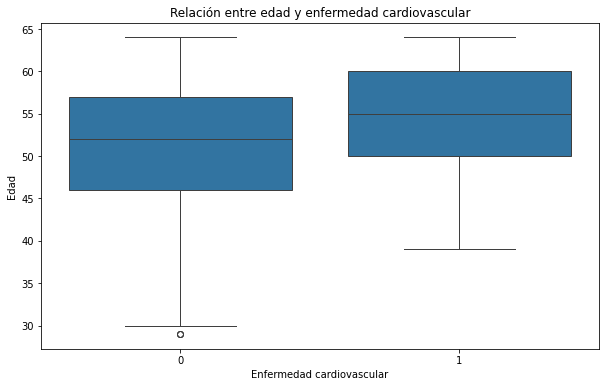

In [173]:
# Graficar la relacion entre age y cardio 
plt.figure(figsize=(10, 6))
sns.boxplot(x='cardio', y='age', data=data)
plt.title('Relación entre edad y enfermedad cardiovascular')
plt.xlabel('Enfermedad cardiovascular')
plt.ylabel('Edad')
plt.show()

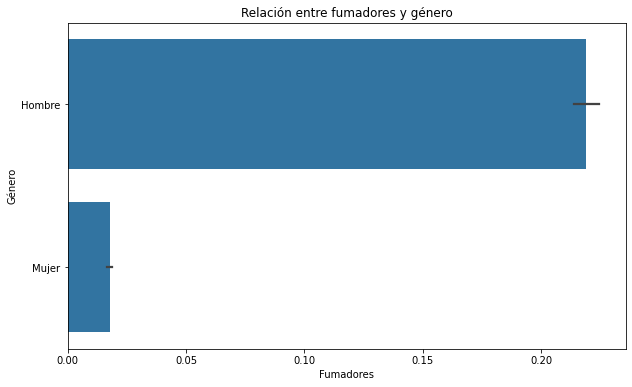

In [174]:
# Cambiar momentaneamente los nombres de las variables de la columna gender
data['gender'] = data['gender'].replace({1: 'Mujer', 2: 'Hombre'})

# Graficar la relacion entre smoke y gender
plt.figure(figsize=(10, 6))
sns.barplot(x='smoke', y='gender', data=data)
plt.title('Relación entre fumadores y género')
plt.xlabel('Fumadores')
plt.ylabel('Género')
plt.show()


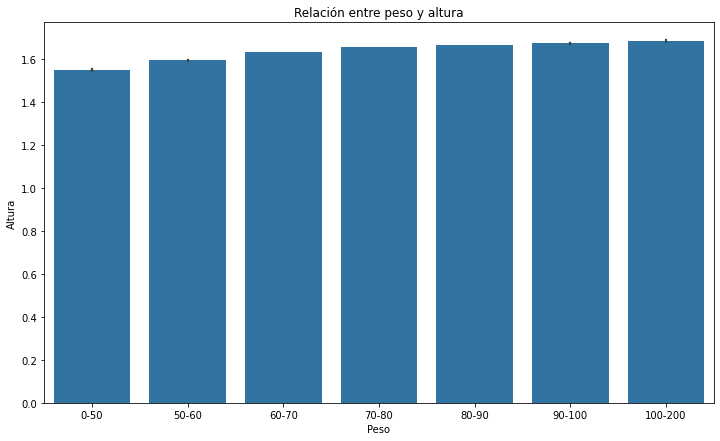

In [175]:
# Graficar con barplot la relacion entre weight y height
# Convertir la columna weight a numerico
data['weight'] = pd.to_numeric(data['weight'], errors='coerce')

# Agrupar el peso por rangos de 10
data['weight'] = pd.cut(data['weight'], bins = [0, 50, 60, 70, 80, 90, 100, 200], labels = ['0-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-200'], right = False)

# Graficar con barplot la relacion entre weight y height
plt.figure(figsize=(12, 7))
sns.barplot(x='weight', y='height', data=data)
plt.title('Relación entre peso y altura')
plt.xlabel('Peso')
plt.ylabel('Altura')
plt.show()